# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## start with image size of 75, increase epochs, update size recurrently


---
## Import libraries

In [1]:
!ls -l

total 4400
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 15 02:37 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  210001 Jan 15 18:51 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  108386 Jan 20 18:46 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  179449 Jan 14 21:28 7_resnext50_sz_100.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  201400 Jan 15 02:17 8_resnext50_more_epoch_sz300.ipynb
-rw-rw-r-- 1 ub

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973264
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan 15 14:20 sub
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 13 ubuntu ubuntu       4096 Jan 15 16:52 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=75
bs=32
lr = 0.005

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.1), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 61%|██████    | 25/41 [00:00<00:00, 26.91it/s, loss=3.68] 


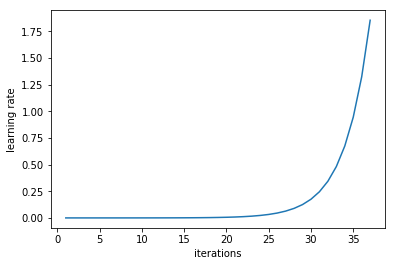

In [12]:
learn.sched.plot_lr()

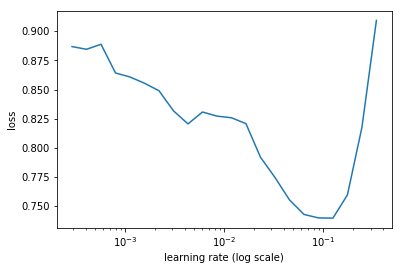

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 9)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[0.      0.60679 0.48634 0.73296]                          
[1.      0.51527 0.43851 0.73579]                          
[2.      0.46867 0.44946 0.71591]                          
[3.      0.4282  0.43881 0.72727]                          
[4.      0.41189 0.43    0.72159]                          
[5.      0.41938 0.39905 0.83239]                          
[6.      0.37819 0.40546 0.83239]                          
[7.      0.39385 0.40983 0.82671]                          
[8.      0.39491 0.39256 0.83523]                          



### Stochastic Gradient Descent with Restart

In [15]:
lr = 0.005

In [16]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.59909 0.4257  0.8125 ]                          
[1.      0.5199  0.39655 0.80966]                          
[2.      0.50147 0.45081 0.78125]                          
[3.      0.47486 0.38309 0.82386]                          
[4.      0.44304 0.43014 0.80398]                          
[5.      0.42511 0.41297 0.8125 ]                          
[6.      0.42028 0.39394 0.82671]                          
[7.      0.45028 0.43417 0.81534]                          
[8.      0.45135 0.39994 0.80682]                          
[9.      0.43844 0.44165 0.78409]                          
[10.       0.44523  0.44652  0.76704]                      
[11.       0.44388  0.44615  0.78409]                      
[12.       0.42727  0.52609  0.74148]                      
[13.       0.40698  0.46453  0.76421]                      
[14.       0.40391  0.43885  0.77841]                      
[15.       0.46122  0.42196  0.80398]                      
[16.       0.4214   0.4589   0.76421]   

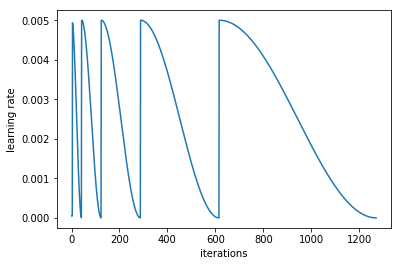

In [17]:
learn.sched.plot_lr()

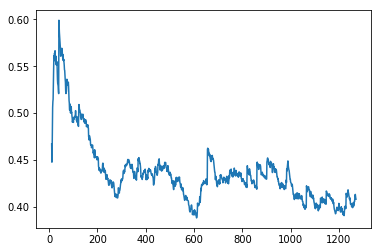

In [18]:
learn.sched.plot_loss()

In [19]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.3396357865754324, 0.8504672897196262)

In [20]:
# lr/10

In [21]:
# lr/9

In [22]:
# lr/3

In [23]:
# lr/4

### Unfreeze Layers

In [24]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [25]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.57576 0.42629 0.81818]                          
[1.      0.52157 0.48031 0.74148]                          
[2.      0.45319 0.38832 0.80398]                          
[3.      0.42541 0.41028 0.79829]                          
[4.      0.42329 0.45004 0.79829]                          
[5.      0.40144 0.43054 0.80682]                          
[6.      0.40063 0.45828 0.79261]                          
[7.      0.44552 0.5067  0.76136]                          
[8.      0.41576 0.42427 0.80398]                          
[9.      0.4362  0.42194 0.78125]                          
[10.       0.41374  0.49151  0.77557]                      
[11.       0.37177  0.42916  0.79546]                      
[12.       0.35699  0.38548  0.8125 ]                      
[13.       0.32826  0.47232  0.78125]                      
[14.       0.31694  0.38433  0.83239]                      
[15.       0.34859  0.34402  0.83239]                      
[16.       0.33347  0.30857  0.86932]   

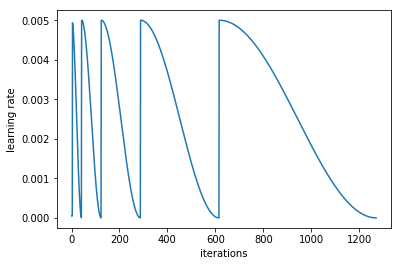

In [26]:
learn.sched.plot_lr()

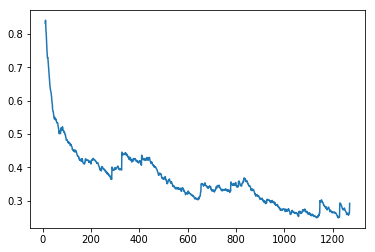

In [27]:
learn.sched.plot_loss()

In [28]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.24919914955793604, 0.897196261682243)

## Resize the images

In [29]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

## Image Size of 128

In [30]:
#train for image size 128x128
learn.set_data(get_data(128, 32))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.3757  0.38331 0.81818]                          
[1.      0.34228 0.41343 0.79829]                          
[2.      0.33356 0.4013  0.80966]                          
[3.      0.33388 0.39797 0.80398]                          
[4.      0.34251 0.36027 0.82671]                          
[5.      0.32427 0.35276 0.82671]                          
[6.      0.35802 0.40913 0.80398]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.44931 0.33488 0.84943]                          
[1.      0.42435 0.3493  0.83807]                          
[2.      0.35199 0.3361  0.84091]                          
[3.      0.31681 0.38249 0.83807]                          
[4.      0.33171 0.48417 0.79261]                          
[5.      0.31607 0.30041 0.86079]                          
[6.      0.33585 0.28196 0.89204]                          



In [31]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2448391106989339, 0.897196261682243)

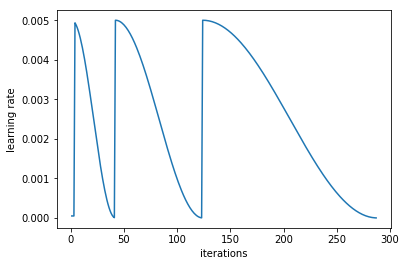

In [32]:
learn.sched.plot_lr()

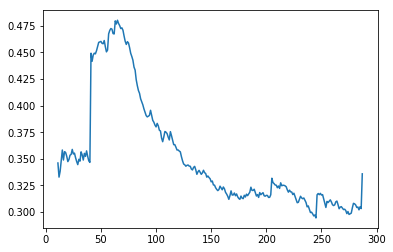

In [33]:
learn.sched.plot_loss()

## Image Size of 200

In [34]:
#train for image size 200 x 200
learn.set_data(get_data(200, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.35423 0.32059 0.85714]                          
[1.      0.3702  0.29738 0.88393]                          
[2.      0.33418 0.30765 0.87202]                          
[3.      0.3416  0.30127 0.88095]                          
[4.      0.37097 0.30204 0.86905]                          
[5.      0.32986 0.28355 0.875  ]                          
[6.      0.33329 0.29331 0.86905]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.36567 0.29676 0.86905]                          
[1.      0.3583  0.26473 0.88393]                          
[2.      0.33676 0.25124 0.89286]                          
[3.      0.52857 0.38606 0.80952]                          
[4.      0.48973 0.60004 0.71429]                          
[5.      0.38987 0.34873 0.84226]                          
[6.      0.34875 0.39705 0.80952]                          



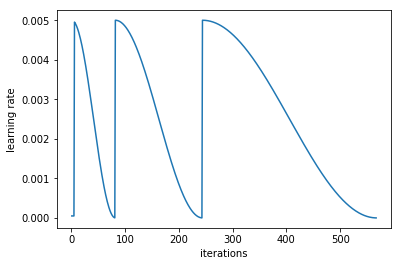

In [35]:
learn.sched.plot_lr()

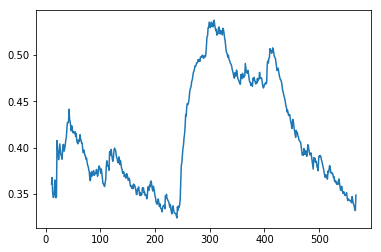

In [36]:
learn.sched.plot_loss()

In [37]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2795494182964972, 0.8847352024922118)

## Save learner

In [38]:
#learn.save('resnext50_sz75_sequ')

In [39]:
#learn.load('resnext50_sz75_sequ')

## Output predictions to csv file

In [40]:
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_sequ.csv')

# END FILE

### Run Learner again

In [48]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.37915 0.42718 0.80655]                          
[1.      0.36574 0.36442 0.83036]                          
[2.      0.36762 0.30271 0.84524]                          
[3.      0.36753 0.31425 0.86607]                          
[4.      0.34616 0.34201 0.84821]                          
[5.      0.3494  0.3042  0.85714]                          
[6.      0.30073 0.29245 0.86012]                          
[7.      0.38146 0.36861 0.83333]                          
[8.      0.3426  0.34074 0.83333]                          
  1%|          | 1/81 [00:00<00:52,  1.53it/s, loss=0.34]

KeyboardInterrupt: 

In [42]:
learn.sched.plot_loss()

In [43]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

### Run Learner again

In [44]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [45]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [46]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

## Save predictions

In [47]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )